In [ ]:
import pandas as pd
import numpy as np
import sqlalchemy as sql

In [ ]:
df_main = pd.read_csv('main.csv')
df_net = pd.read_csv('net_property.csv')
df_seats = pd.read_csv('seats_property.csv')
df_type = pd.read_csv('type_property.csv')

## Продолжаем работать с датасетом про общепит. Хорошие новости - отдел безопасности оформил вам доступ к базе данных нашей организации и теперь вы сможете подключаться к ней и забирать новые данные. Для удобства будем работать с SQLITE3.

В базе данных содержатся сведения об организациях общепита:

    Выручка
    Число сотрудников
    Налоги
    Оценка на Яндекс
    Оценка на 2GIS
    Проверок

за 2019 - 2022 года. Сведения в таблицах представлены следующим образом
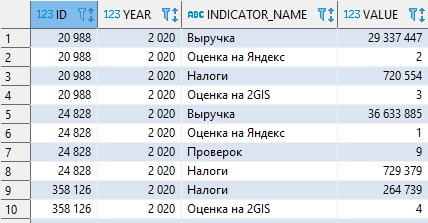

    ID - тот самый ID из main.csv
    YEAR - год отчета
    INDICATOR_NAME - показатель
    VALUE - значение показателя.

Например, первая строчка говорит нам о том, что выручка для организации с ID 20988 в 2020 году составила 29 337 447.

## Задание 1

Для каждой организации из main.csv подтяните выручку и число сотрудников за 2020, 2021 и 2022.<br> 
Посчитайте дельту по выручке и сотрудникам между 2022 и 2020. Отсортируйте организации по убыванию выручки.<br> 
Для организаций с одинаковой выручкой выполните сортировку по возрастанию ID.<br>
Если у организации нет данных по выручке или числу сотрудников за 2020 или 2022, то исключите их.<br>
Названия колонок сделайте на русском языке.

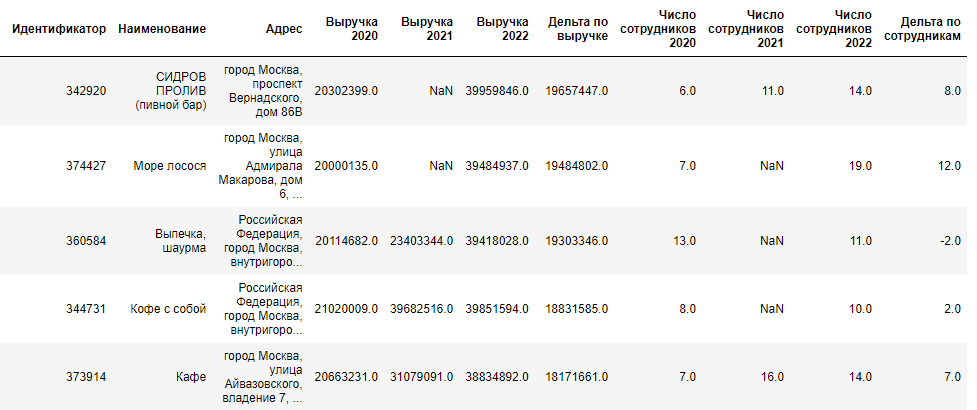

Загрузите в формате csv (разделитель запятая, индекс не добавляйте).

#### 1586 rows × 11 columns


In [331]:
con = sql.create_engine('sqlite:///indicators_db.sqlite3')

table_names = pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table';", con)
df_2022 = pd.read_sql_query(f"SELECT * from {table_names['tbl_name'][1]}", con)

df = df_2022.pivot(index='ID', columns=['INDICATOR_NAME', 'YEAR'], values='VALUE').reset_index()

df = df[['ID', 'Выручка', 'Число сотрудников']] 
df.set_index('ID')
df.columns = list(map(lambda col: f'{col[0]} {col[1]}'.strip(), df.columns))

df = pd.merge(df_main, df, on='ID', how='left')

mask = df['Выручка 2020'].notna() & df['Выручка 2022'].notna() & df['Число сотрудников 2020'].notna() & df['Число сотрудников 2022'].notna()
df = df[mask]

df.insert(6,'Дельта по выручке', df['Выручка 2022'] - df['Выручка 2020'])
df.insert(10,'Дельта по сотрудникам', df['Число сотрудников 2022'] - df['Число сотрудников 2020'])

df = df.sort_values(['Дельта по выручке', 'ID'], ascending=[False, True])

result = df.rename(columns={'ID': 'Идентификатор', 'Name': 'Наименование', 'Address': 'Адрес'})
result.to_csv('result.csv', index=False)
result

,Идентификатор,Наименование,Адрес,Выручка 2020,Выручка 2021,Выручка 2022,Дельта по выручке,Число сотрудников 2020,Число сотрудников 2021,Число сотрудников 2022,Дельта по сотрудникам
9205,342920,СИДРОВ ПРОЛИВ (пивной бар),"город Москва, проспект Вернадского, дом 86В",20302399.0,NaN,39959846.0,19657447.0,6.0,11.0,14.0,8.0
9596,374427,Море лосося,"город Москва, улица Адмирала Макарова, дом 6, ...",20000135.0,NaN,39484937.0,19484802.0,7.0,NaN,19.0,12.0
5890,360584,"Выпечка, шаурма","Российская Федерация, город Москва, внутригоро...",20114682.0,23403344.0,39418028.0,19303346.0,13.0,NaN,11.0,-2.0
8745,344731,Кофе с собой,"Российская Федерация, город Москва, внутригоро...",21020009.0,39682516.0,39851594.0,18831585.0,8.0,NaN,10.0,2.0
4904,373914,Кафе,"город Москва, улица Айвазовского, владение 7, ...",20663231.0,31079091.0,38834892.0,18171661.0,7.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
9140,129686,Три правила,"город Москва, улица Мичуринский Проспект, Олим...",39778987.0,NaN,21141214.0,-18637773.0,15.0,17.0,8.0,-7.0
4338,344859,Хлеб с маслом,"город Москва, Манежная площадь, дом 1, строение 2",38772086.0,NaN,20065466.0,-18706620.0,13.0,8.0,15.0,2.0
1411,150865,Lost Bar,"город Москва, Новокосинская улица, дом 22",39338589.0,34587746.0,20463995.0,-18874594.0,15.0,18.0,15.0,0.0
2868,239777,Surf Coffee,"город Москва, Берсеневская набережная, дом 14,...",39515097.0,28540582.0,20432343.0,-19082754.0,19.0,NaN,9.0,-10.0
